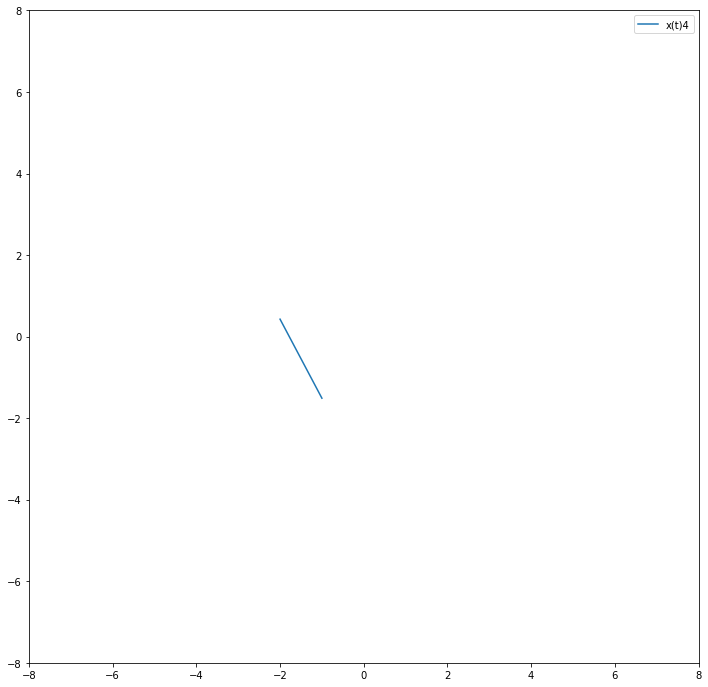

In [47]:
#show trajectories ODE
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from scipy.integrate import solve_ivp
import numpy as np

def vanderpol_f(t, y):
    x0,x1 = y
    return np.array([ x1, 
                      2 * ( 1 - x0 * x0 ) * x1 - x0 ])
#def seir_f(t, y, beta, sigma, gamma):
#    s, e, i, r = y
#    return np.array([-beta * i * s,
#                     -sigma * e + beta * i * s, 
#                     -gamma * i + sigma * e, 
#                     gamma * i])

# try some parameter values
#beta = 0.6 #0.1 .. 10.0
#sigma = 0.2
#gamma = 0.2

maxT = 12000
x0min = -8
x0max = 8
x1min = -8
x1max = 8


t_eval_points_count = 10000
#sol = solve_ivp(vanderpol_f, [0, maxT], [2.0,2.0], method="RK23", t_eval=np.linspace( 0, maxT, t_eval_points_count ),
#                rtol=1e-7)
#sol1 = solve_ivp(vanderpol_f, [0, maxT], [2.0,0], method="RK23", t_eval=np.linspace( 0, maxT, t_eval_points_count ),
#                rtol=1e-7)
#sol3 = solve_ivp(vanderpol_f, [0, maxT], [2.0,-1], method="RK23", t_eval=np.linspace( 0, maxT, t_eval_points_count ),
#                rtol=1e-7)
sol4 = solve_ivp(vanderpol_f, [0, maxT], [-1,-2], method="LSODA", t_eval=np.linspace( 0, maxT, t_eval_points_count ),
                rtol=1e-7)

#print(sol)
fig = plt.figure(figsize=(12,12)); ax = fig.gca()
#curves = ax.plot(sol.t, sol.y.T)
#ax.legend(curves, ['x','y']);
ax.set(xlim=(x0min, x0max))
ax.set(ylim=(x1min, x1max))

#curves2 = ax.plot(sol.y.T[0], sol.y.T[1])
#ax.legend(curves2, ['x(t)2']);

#curves1 = ax.plot(sol1.y.T[0], sol1.y.T[1])
#ax.legend(curves2, ['x(t)1']);

#curves3 = ax.plot(sol3.y.T[0], sol3.y.T[1])
#ax.legend(curves3, ['x(t)3']);

curves4 = ax.plot(sol4.y.T[0], sol4.y.T[1])
ax.legend(curves4, ['x(t)4']);


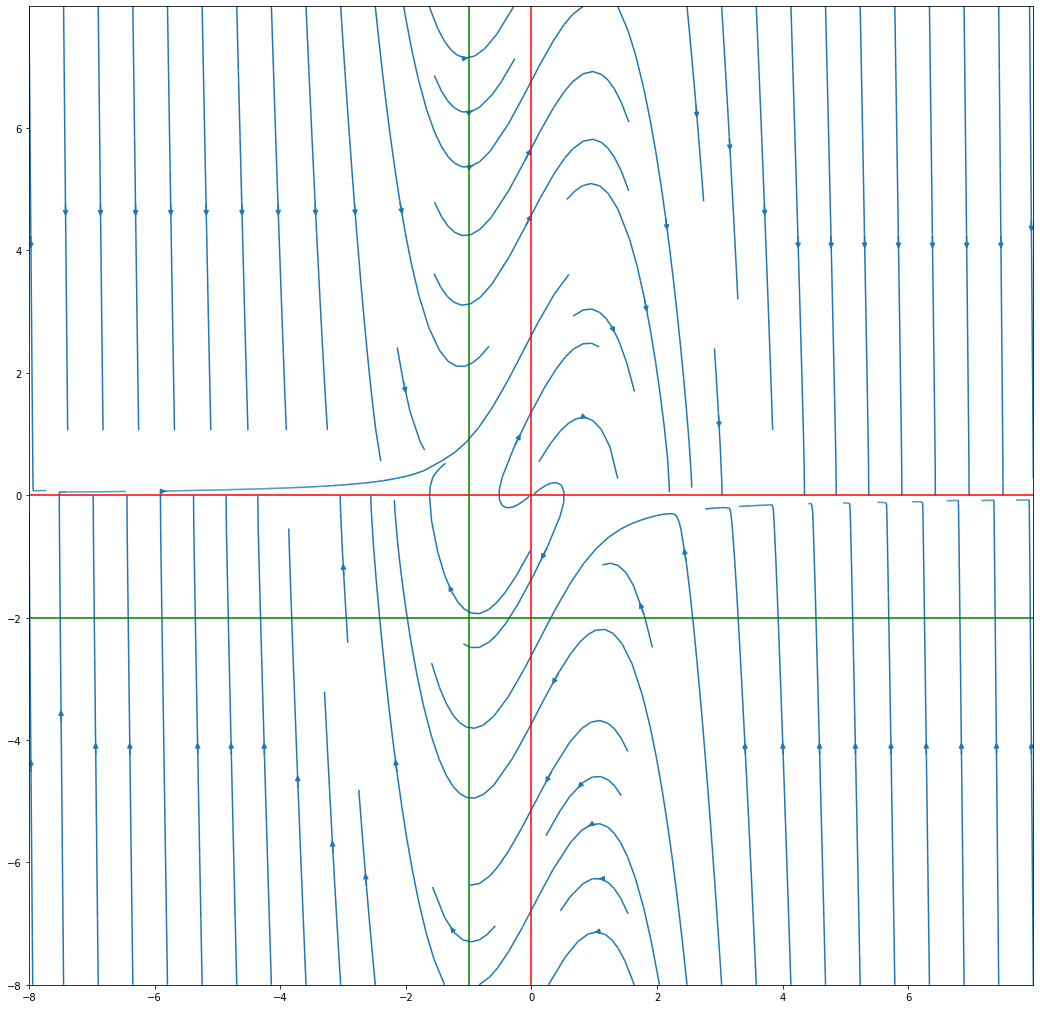

In [48]:
from pylab import *

xvalues, yvalues = meshgrid(arange (-8, 8, 0.01), arange(-8, 8, 0.01))

# x1, 
# 2 * ( 1 - x0 * x0 ) * x1 - x0

ones = np.empty(xvalues.shape)
ones.fill(1.0)
twos = np.empty(xvalues.shape)
twos.fill(2.0)

xdot = yvalues
ydot = twos * (ones - xvalues * xvalues) * yvalues - xvalues

fig = plt.figure(figsize=(18,18))
plt.axvline(0.0, color='r')
plt.axhline(0.0, color='r')
plt.axvline(-1, color='g')
plt.axhline(-2, color='g')
streamplot(xvalues, yvalues, xdot, ydot)
plt.axvspan(xmin=2.0, xmax=3.0, ymin=2.0, ymax=3.0, color='r')

show()
